In [1]:
# Mount data from drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

**Heart Disease Analysis**

#**Data exploration**

In [40]:
data= pd.read_csv('/content/drive/MyDrive/heart_2020_cleaned.csv')

In [5]:
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31


# **Data visualization**

In [7]:
data['HeartDisease'].value_counts()

No     292422
Yes     27373
Name: HeartDisease, dtype: int64

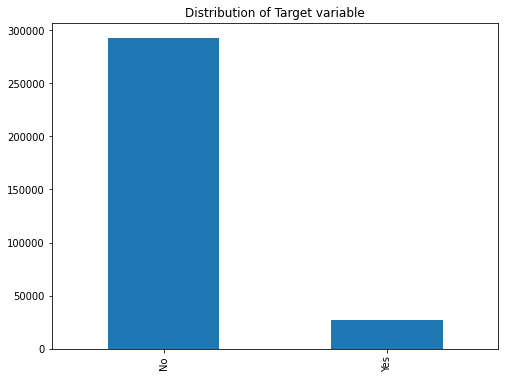

In [8]:
import matplotlib.pyplot as plt

(data['HeartDisease'].value_counts().plot(
    kind='bar',
    figsize=(8,6),
    title='Distribution of Target variable',
    )
);
plt.show()

In [41]:
for i in data:
  if data[str(i)].nunique() <40:
    print(f'Unique values in {i} are {list(data[str(i)].unique())}')

Unique values in HeartDisease are ['No', 'Yes']
Unique values in Smoking are ['Yes', 'No']
Unique values in AlcoholDrinking are ['No', 'Yes']
Unique values in Stroke are ['No', 'Yes']
Unique values in PhysicalHealth are [3.0, 0.0, 20.0, 28.0, 6.0, 15.0, 5.0, 30.0, 7.0, 1.0, 2.0, 21.0, 4.0, 10.0, 14.0, 18.0, 8.0, 25.0, 16.0, 29.0, 27.0, 17.0, 24.0, 12.0, 23.0, 26.0, 22.0, 19.0, 9.0, 13.0, 11.0]
Unique values in MentalHealth are [30.0, 0.0, 2.0, 5.0, 15.0, 8.0, 4.0, 3.0, 10.0, 14.0, 20.0, 1.0, 7.0, 24.0, 9.0, 28.0, 16.0, 12.0, 6.0, 25.0, 17.0, 18.0, 21.0, 29.0, 22.0, 13.0, 23.0, 27.0, 26.0, 11.0, 19.0]
Unique values in DiffWalking are ['No', 'Yes']
Unique values in Sex are ['Female', 'Male']
Unique values in AgeCategory are ['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74', '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29']
Unique values in Race are ['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Hispanic']
Unique values in Diabetic are ['Yes

#**corr between Age category and Heart Disease**

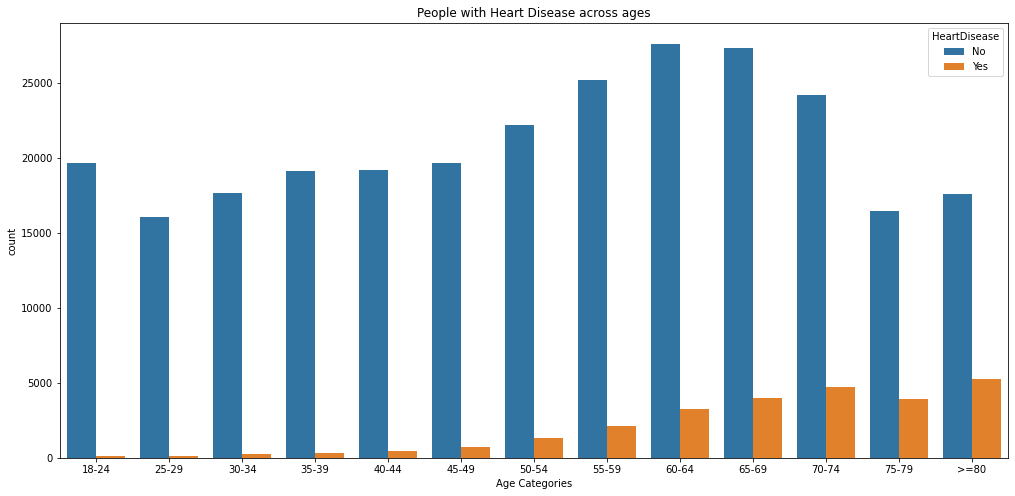

In [ ]:
# Change the value of agecategory from "80 or older" to ">80"
data.loc[data.AgeCategory == '80 or older', 'AgeCategory'] = '>=80'

# Get unique values of agecategory and sort it
order = data['AgeCategory'].unique()
order.sort()

# Set the figure size
plt.figure(figsize=(17, 8))

# Draw the countplot of agecategory and heartdisease
sns.countplot(data=data, x='AgeCategory', hue='HeartDisease', order=order)

# Set the title of the plot
plt.title('People with Heart Disease across ages')

# Set the x-axis label
plt.xlabel('Age Categories')

# Show the plot
plt.show()

#**Physical Health Problems and Heart Disease**

Text(0.5, 0, 'Physical Health Problems')

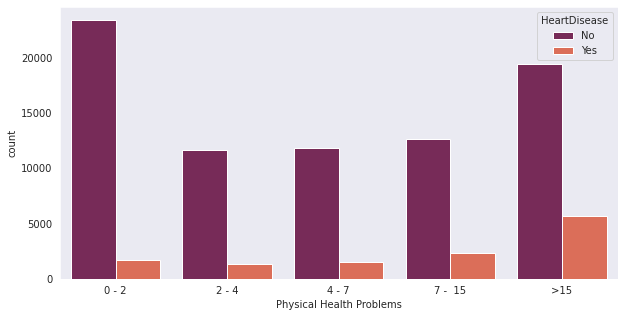

In [ ]:
plt.figure(figsize=(10,5))
#Explore the Physical health problem feature
ph_bins = pd.cut(data["PhysicalHealth"],  bins=[0,2,4,7,15,np.inf],  labels=["0 - 2","2 - 4","4 - 7","7 -  15"," >15 "])

sns.countplot(x = ph_bins, palette='rocket', hue=data['HeartDisease'])
plt.xlabel('Physical Health Problems')

In [ ]:
bins = [0,5, np.inf]
#data['PhysicalHealth_category'] = pd.cut(data["PhysicalHealth"], bins, labels=php_labs)

In [ ]:
#data.drop('PhysicalHealth',axis=1,inplace=True)
data['PhysicalHealth_category'].value_counts()


Physical Health Problem > 5     45905
Physical Health Problems ≤ 5    45553
Name: PhysicalHealth_category, dtype: int64

#**Data Preprocessing:**

# **Clean missing values in features**

In [37]:
data.isnull().values.any()

False

In [38]:
data.isnull().sum()

HeartDisease      0
Smoking           0
Stroke            0
PhysicalHealth    0
DiffWalking       0
Sex               0
AgeCategory       0
Diabetic          0
SleepTime         0
Asthma            0
KidneyDisease     0
SkinCancer        0
bmi_category      0
dtype: int64

#**Clean duplicate values in features**


In [9]:
#cheacking the duplicate rows
print(data.shape)

duplicate_rows_data = data[data.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

(319795, 18)
number of duplicate rows:  (18078, 18)


In [10]:
data.count()

HeartDisease        319795
BMI                 319795
Smoking             319795
AlcoholDrinking     319795
Stroke              319795
PhysicalHealth      319795
MentalHealth        319795
DiffWalking         319795
Sex                 319795
AgeCategory         319795
Race                319795
Diabetic            319795
PhysicalActivity    319795
GenHealth           319795
SleepTime           319795
Asthma              319795
KidneyDisease       319795
SkinCancer          319795
dtype: int64

In [11]:
#Dropping the duplicate rows

data = data.drop_duplicates()
data.count()

HeartDisease        301717
BMI                 301717
Smoking             301717
AlcoholDrinking     301717
Stroke              301717
PhysicalHealth      301717
MentalHealth        301717
DiffWalking         301717
Sex                 301717
AgeCategory         301717
Race                301717
Diabetic            301717
PhysicalActivity    301717
GenHealth           301717
SleepTime           301717
Asthma              301717
KidneyDisease       301717
SkinCancer          301717
dtype: int64

Unique values of features

In [12]:
for i in data:
  if data[str(i)].nunique() <40:
    print(f'Unique values in {i} are {list(data[str(i)].unique())}')

Unique values in HeartDisease are ['No', 'Yes']
Unique values in Smoking are ['Yes', 'No']
Unique values in AlcoholDrinking are ['No', 'Yes']
Unique values in Stroke are ['No', 'Yes']
Unique values in PhysicalHealth are [3.0, 0.0, 20.0, 28.0, 6.0, 15.0, 5.0, 30.0, 7.0, 1.0, 2.0, 21.0, 4.0, 10.0, 14.0, 18.0, 8.0, 25.0, 16.0, 29.0, 27.0, 17.0, 24.0, 12.0, 23.0, 26.0, 22.0, 19.0, 9.0, 13.0, 11.0]
Unique values in MentalHealth are [30.0, 0.0, 2.0, 5.0, 15.0, 8.0, 4.0, 3.0, 10.0, 14.0, 20.0, 1.0, 7.0, 24.0, 9.0, 28.0, 16.0, 12.0, 6.0, 25.0, 17.0, 18.0, 21.0, 29.0, 22.0, 13.0, 23.0, 27.0, 26.0, 11.0, 19.0]
Unique values in DiffWalking are ['No', 'Yes']
Unique values in Sex are ['Female', 'Male']
Unique values in AgeCategory are ['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74', '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29']
Unique values in Race are ['White', 'Black', 'Asian', 'American Indian/Alaskan Native', 'Other', 'Hispanic']
Unique values in Diabetic are ['Yes

#**Detecting** **Outliers**


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

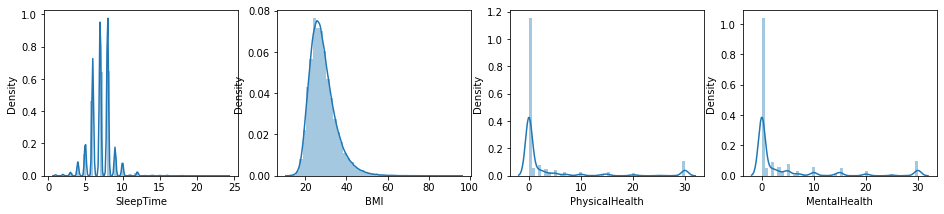

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

col= [ 'SleepTime', 'BMI' , "PhysicalHealth" , 'MentalHealth']

plt.figure(figsize=(16,14))
k=1
for i in col :
    plt.subplot(4,4,k)
    sns.distplot(data[i])
    k=k+1
plt.show()

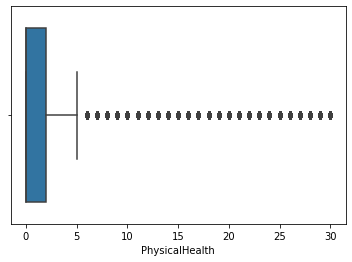

In [14]:
#Detecting Outliers
sns.boxplot(x=data['PhysicalHealth'])

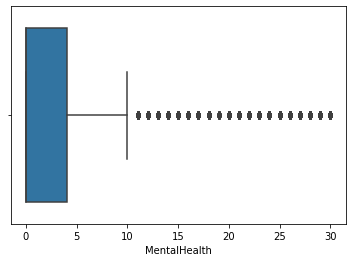

In [15]:
sns.boxplot(x=data['MentalHealth'])

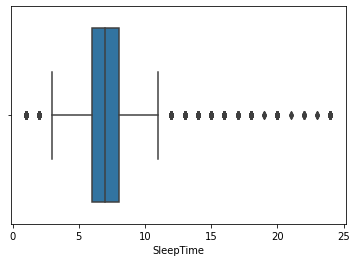

In [16]:
sns.boxplot(x=data['SleepTime'])

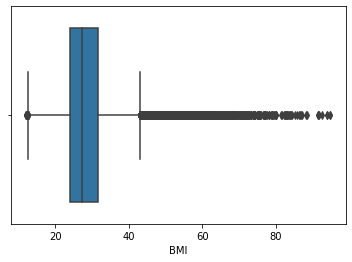

In [17]:
sns.boxplot(x=data['BMI'])

In [18]:
#remving Outliers

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

BMI               7.62
PhysicalHealth    2.00
MentalHealth      4.00
SleepTime         2.00
dtype: float64


In [19]:


data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

<ipython-input-19-ba54541047be>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]


(222531, 18)

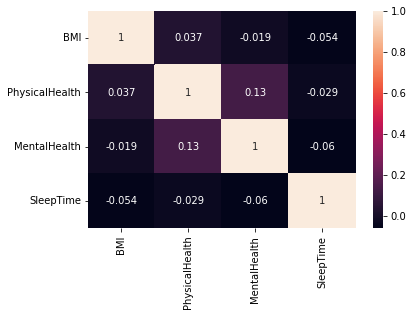

In [20]:
sns.heatmap(data.corr() , annot=True)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

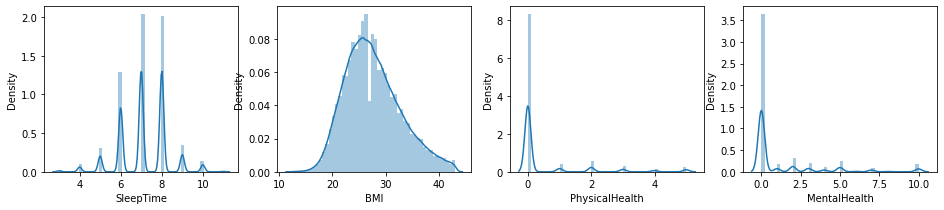

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

col= [ 'SleepTime', 'BMI' , "PhysicalHealth" , 'MentalHealth']

plt.figure(figsize=(16,14))
k=1
for i in col :
    plt.subplot(4,4,k)
    sns.distplot(data[i])
    k=k+1
plt.show()

# Encode categorical features

In [22]:
bmi_labs = ['Underweight (BMI < 18.5)', 'Normal weight (18.5 <= BMI < 25.0)', 'Overweight (25.0 <= BMI < 30.0)', 'Obese (30.0 <= BMI < 35.0)', 'Extremly Obese (BMI >= 35.0)']

bins = [0, 18.5, 25, 30, 35, np.inf]
data['bmi_category'] = pd.cut(data["BMI"], bins, labels=bmi_labs)
data.drop('BMI',axis=1,inplace=True)
data['bmi_category'].value_counts()

Overweight (25.0 <= BMI < 30.0)       82261
Normal weight (18.5 <= BMI < 25.0)    71072
Obese (30.0 <= BMI < 35.0)            43873
Extremly Obese (BMI >= 35.0)          21873
Underweight (BMI < 18.5)               3452
Name: bmi_category, dtype: int64

In [23]:
# seperate numerical and categorical columns
numerical_cols = []
cat_cols = []
cols = data.columns
for i in range(len(cols)):
    if data[cols[i]].dtype == np.int64 or data[cols[i]].dtype == np.int32 or data[cols[i]].dtype == np.float64 or data[cols[i]].dtype == np.float32 :
        numerical_cols.append(cols[i])
    else :
        cat_cols.append(cols[i])
print("categrical_feature",cat_cols)
print("numerical_feature",numerical_cols)

categrical_feature ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer', 'bmi_category']
numerical_feature ['PhysicalHealth', 'MentalHealth', 'SleepTime']


ordinal anda Nominal  Data

In [24]:
# encode the data
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
order_cols = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Sex','AgeCategory','Diabetic','PhysicalActivity','GenHealth','Asthma','KidneyDisease','SkinCancer','bmi_category']

no_order_cols = ["Race"]
 # Label encoding
for col in order_cols:
    data[col] = labelencoder.fit_transform(data[col])

# One-hot encoding
for col in no_order_cols:
    dummy_col = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummy_col], axis=1)
    del data[col]

In [25]:
data.dtypes

HeartDisease                             int64
Smoking                                  int64
AlcoholDrinking                          int64
Stroke                                   int64
PhysicalHealth                         float64
MentalHealth                           float64
DiffWalking                              int64
Sex                                      int64
AgeCategory                              int64
Diabetic                                 int64
PhysicalActivity                         int64
GenHealth                                int64
SleepTime                              float64
Asthma                                   int64
KidneyDisease                            int64
SkinCancer                               int64
bmi_category                             int64
Race_American Indian/Alaskan Native      uint8
Race_Asian                               uint8
Race_Black                               uint8
Race_Hispanic                            uint8
Race_Other   

#**Correlation between the features**

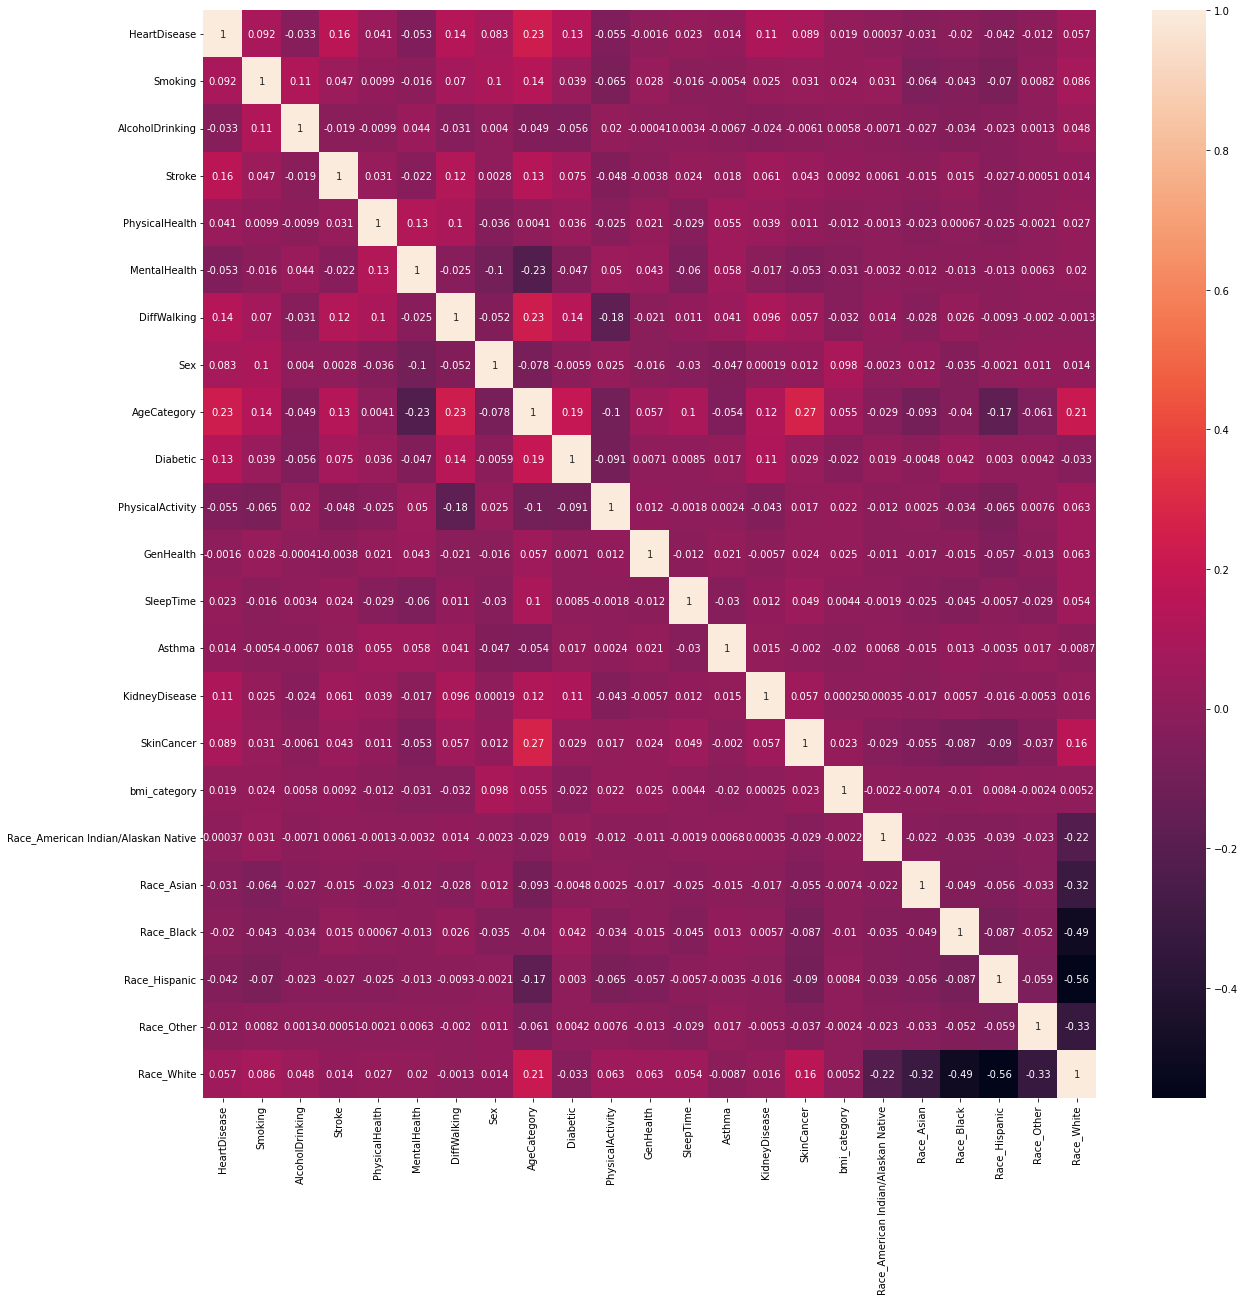

In [26]:
# Heatmap
corr_matrix = data.corr()
plt.figure(figsize = (20,20))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

**Correlation between the features and the main target**

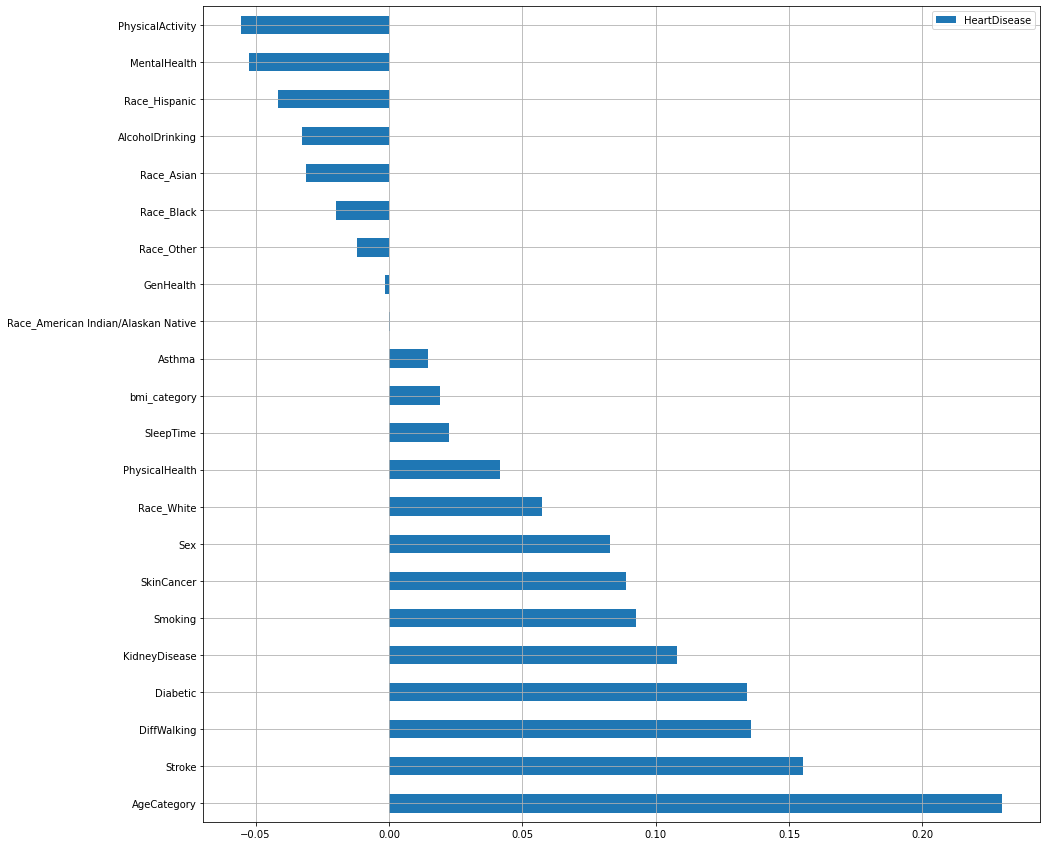

In [27]:
#Correlation check
corr = pd.DataFrame(data.corr()['HeartDisease']).drop('HeartDisease',axis=0).sort_values(by = 'HeartDisease',ascending=False)
corr.plot(kind='barh',grid=True,figsize=(15,15))

#***feature selection***

In [28]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest, chi2,mutual_info_classif,SelectFromModel

y=data.loc[:,'HeartDisease']
X=data.drop('HeartDisease',axis=1)

data.drop(['GenHealth','Race_American Indian/Alaskan Native'],axis=1,inplace=True)


X_F=data.drop('HeartDisease',axis=1)
y_F=data.loc[:,'HeartDisease']

#featureselection=SelectKBest(chi2, k=13)
#X_F = featureselection.fit_transform(X_F,y_F)

#sel = SelectFromModel(ExtraTreesClassifier(n_estimators = 20)) 
#sel.fit(X_F,y_F)
#X_F= sel.transform(X_F)
#sel.get_support()


print("orginl_feature count: ", X.shape)
print("select_feature count: ", X_F.shape)

orginl_feature count:  (222531, 22)
select_feature count:  (222531, 12)


#**`Modelling and Evaluation`**




In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X=scaler.fit_transform(X)
X_F=scaler.fit_transform(X_F)

In [30]:
# oversampling using SMOTE
from imblearn.over_sampling import SMOTE

over = SMOTE(k_neighbors=2000)
X, y = over.fit_resample(X, y)

over_selected = SMOTE(k_neighbors=2000)
X_F, y_F = over_selected.fit_resample(X_F, y_F)

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=34)

X_Ftrain,X_Ftest,y_Ftrain,y_Ftest=train_test_split(X_F,y_F,train_size=0.7,random_state=34)

In [ ]:
# define model
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

model = XGBClassifier(scale_pos_weight=5.135)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
from statistics import mean


# evaluate model
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))




Mean ROC AUC: 0.98426


In [ ]:
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

#print("Training Accuracy: ", model_o.score(x_train2, y_train2))
#print('Testing Accuarcy: ', model_o.score(x_test2, y_test2))

f1_score(y_test,y_pred,average='micro')


0.8817741948512484

In [36]:
from sklearn.ensemble import GradientBoostingClassifier


GBCModel = GradientBoostingClassifier(n_estimators=150, max_depth=15, learning_rate=0.4, random_state=44)
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  0.9844248192011964
GBCModel Test Score is :  0.9521717004450835


In [33]:
from sklearn.metrics import f1_score,recall_score,precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Metrics on test original data: ")
print('RandomForestClassifier accuracy',accuracy_score(y_test, y_pred))
print('RandomForestClassifier f1 score:',f1_score(y_test, y_pred))
print('RandomForestClassifier recall score:',recall_score(y_test, y_pred))
print('RandomForestClassifier precision score:',precision_score(y_test, y_pred))

rf.fit(X_Ftrain, y_Ftrain)
y_Fpred = rf.predict(X_Ftest)
print("Metrics on test reduced feature data: ")
print('RandomForestClassifier accuracy',accuracy_score(y_Ftest, y_Fpred))
print('RandomForestClassifier f1 score:',f1_score(y_Ftest, y_Fpred))
print('RandomForestClassifier recall score:',recall_score(y_Ftest, y_Fpred))
print('RandomForestClassifier precision score:',precision_score(y_Ftest, y_Fpred))





Metrics on test original data: 
RandomForestClassifier accuracy 0.9542799906298214
RandomForestClassifier f1 score: 0.9529133805863366
RandomForestClassifier recall score: 0.9274517424536857
RandomForestClassifier precision score: 0.9798124957229863
Metrics on test reduced feature data: 
RandomForestClassifier accuracy 0.952971396722053
RandomForestClassifier f1 score: 0.9513633629619728
RandomForestClassifier recall score: 0.9220915921751522
RandomForestClassifier precision score: 0.9825545278851463


In [35]:
from sklearn.metrics import f1_score,recall_score,precision_score, accuracy_score
from xgboost import XGBClassifier


rf = XGBClassifier()

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print("Metrics on test original data: ")
print('XGBClassifier accuracy',accuracy_score(y_test, y_pred))
print('XGBClassifier f1 score:',f1_score(y_test, y_pred))
print('XGBClassifier recall score:',recall_score(y_test, y_pred))
print('XGBClassifier precision score:',precision_score(y_test, y_pred))

rf.fit(X_Ftrain, y_Ftrain)
y_Fpred = rf.predict(X_Ftest)
print("Metrics on test reduced feature data: ")
print('XGBClassifier accuracy',accuracy_score(y_Ftest, y_Fpred))
print('XGBClassifier f1 score:',f1_score(y_Ftest, y_Fpred))
print('XGBClassifier recall score:',recall_score(y_Ftest, y_Fpred))
print('XGBClassifier precision score:',precision_score(y_Ftest, y_Fpred))


Metrics on test original data: 
XGBClassifier accuracy 0.950071488000517
XGBClassifier f1 score: 0.9483862886727068
XGBClassifier recall score: 0.9195977458219977
XGBClassifier precision score: 0.9790355671258383
Metrics on test reduced feature data: 
XGBClassifier accuracy 0.9474058337439518
XGBClassifier f1 score: 0.9449139995092938
XGBClassifier recall score: 0.9043107915533101
XGBClassifier precision score: 0.9893347506422181
